In [49]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [50]:
img = cv2.imread('./test_images/virat1.jpg')
img.shape         #(x,y,rgbcolor)

(988, 678, 3)

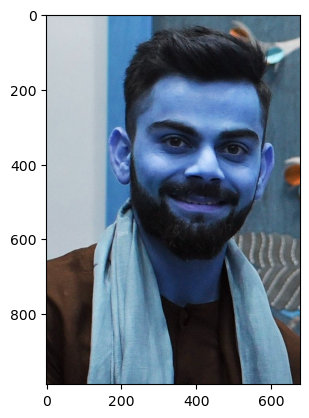

In [51]:
plt.imshow(img)

In [52]:
#we are dealimg with haar transform so converting to gray image is imporntant to increase the accuracy
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(988, 678)

In [53]:
gray

array([[210, 211, 213, ..., 123, 125, 124],
       [209, 210, 211, ..., 121, 121, 119],
       [209, 209, 209, ..., 121, 120, 118],
       ...,
       [ 47,  46,  45, ...,  37,  39,  38],
       [ 47,  46,  45, ...,  39,  39,  36],
       [ 47,  46,  45, ...,  40,  37,  33]], dtype=uint8)

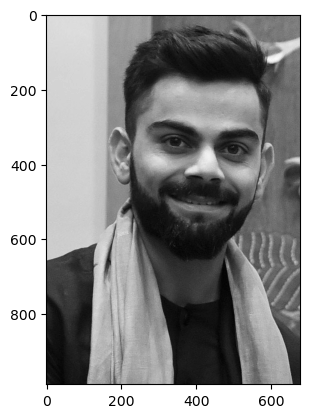

In [54]:
plt.imshow(gray, cmap='gray')

In [55]:
#haarcascade already have the pre designed package to check the face and eyes pattern so we are just calling it inside the cascadeclassifier
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.1, 4)#detecting face where 1.3 is the optimization zooming to check thye image claesrly and 5 is the test confirmation it will verify 5 times the image to recognize face 
faces

array([[199, 180, 430, 430]])

In [56]:
(x,y,w,h) = faces[0]#0 mean starts at 0 index of list so that the value of x is assigned to 352 from the list and so on
x,y,w,h


(199, 180, 430, 430)

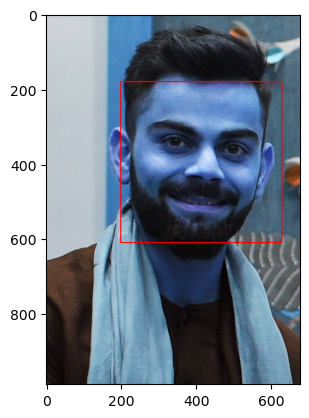

In [57]:
#now to og image we are marking the rectangle on the face width and height & 255 at first means the red color and 2 means the thickness of the rectangle
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

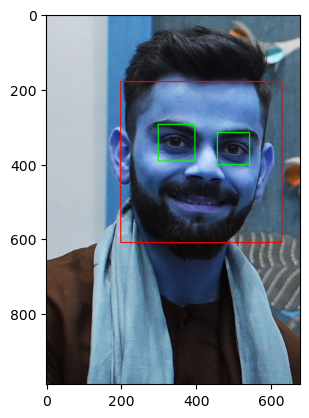

In [58]:
cv2.destroyAllWindows()#previously made operatipon to image is deleted since we made it as a trial image sample
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]#assigning region of interest intead of calling again and again for gray image
    roi_color = face_img[y:y+h, x:x+w]#color image
    eyes = eye_cascade.detectMultiScale(roi_gray)#detecting eyes
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)#drawing rectangle to color image
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

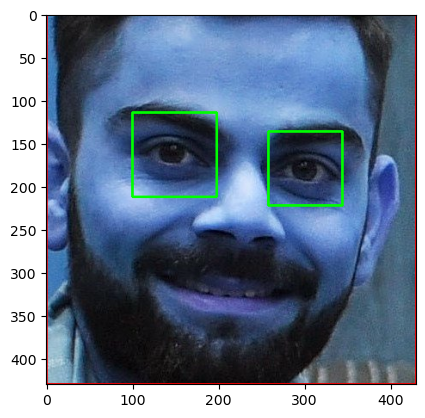

In [59]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [60]:
#creating the loop so that it will perform face and eye cascade to all the images having 2 eyes
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color
  


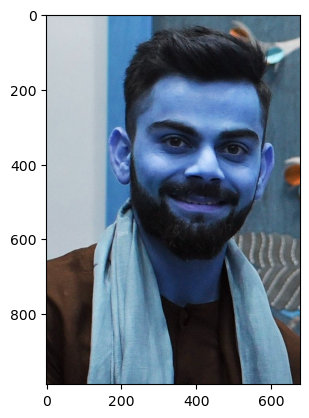

In [62]:
#calling og image for testing
original_image = cv2.imread('./test_images/virat1.jpg')
plt.imshow(original_image)

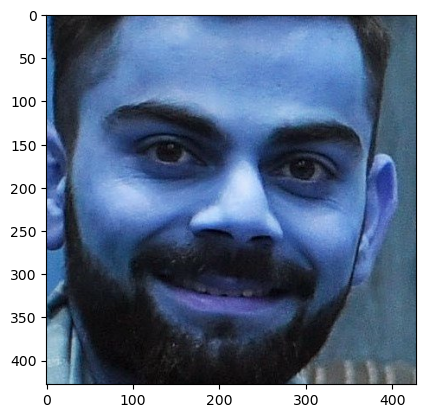

In [63]:
#checking wheter it has two eyes or not if yes then prints else nothing will be printed
cropped_image = get_cropped_image_if_2_eyes('./test_images/virat1.jpg')
plt.imshow(cropped_image)

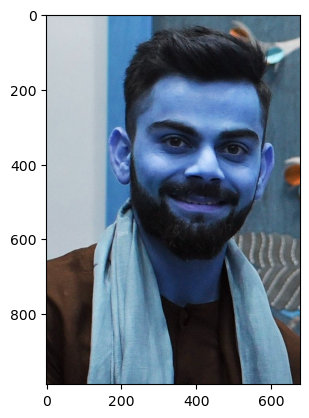

In [68]:
#now checking for the image where the eye is not visible 
org_image_obstructed = cv2.imread('./test_images/virat1.jpg')
plt.imshow(org_image_obstructed)

In [71]:
#it doenot print since the image if not present with two eyes
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/virat2.jpg')
cropped_image_no_2_eyes

In [72]:
#creating the variable of paths and inside dataset creating another folder of craopped images
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [73]:
#checks if any directory present inside the dataset folder if yes then it is appended to img_dirs
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [74]:
img_dirs

['./dataset/cropped',
 './dataset/lionel_messi',
 './dataset/maria_sharapova',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/virat_kohli']

In [75]:
import shutil #Imports the shutil module, which provides high-level file operations like deleting directories.
if os.path.exists(path_to_cr_data):#checks if the cropped file exist
     shutil.rmtree(path_to_cr_data)#if exists then it deletes the folder and creates the fresh one
os.mkdir(path_to_cr_data)#now enabled the directory location with folder ready and in next command the image will be stored in the cropped folder directory

In [76]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]#from last path of the path name will be extracyted 
    print(celebrity_name)
    celebrity_file_names_dict[celebrity_name] = []#prints celebrity name inside the list
    for entry in os.scandir(img_dir):#if image is presentinside the directory
        roi_color = get_cropped_image_if_2_eyes(entry.path)#crop the image
        if roi_color is not None: #if the image is perfect with two eyes
            cropped_folder = path_to_cr_data + celebrity_name#it saves the cropped image with the path and the celebrity name inside this with the help of this concatination
            if not os.path.exists(cropped_folder):#checks if the the directory path is not set to croped folder
                os.makedirs(cropped_folder)#now cropped folder is set 
                cropped_image_dirs.append(cropped_folder)#image is appended to cropped folder
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png" #saves file name with count of image if 2 image present then eg:cat2.png
            cropped_file_path = cropped_folder + "/" + cropped_file_name #file path: eg- cropped/cat.png
            cv2.imwrite(cropped_file_path, roi_color)#image present in roi_color will be saved to cropped folder path
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)#craetes the path of each image of every players with the unique count 
            count += 1

cropped
lionel_messi
Generating cropped images in folder:  ./dataset/cropped/lionel_messi
maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
roger_federer
Generating cropped images in folder:  ./dataset/cropped/roger_federer
serena_williams
Generating cropped images in folder:  ./dataset/cropped/serena_williams
virat_kohli
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [77]:
#converting the image to wavelet form so that we get the clear edges and sharp images
import numpy as np
import pywt#pywt is a library for wavelet transforms, which are useful in signal processing, image compression, and feature extraction.
import cv2    

def w2d(img, mode='haar', level=1):#convert og image to decimal
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )#convert rgb to gray
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  #coeffs_H is the tupple so we r converting it to list so that it can be editable
    coeffs_H[0] *= 0;  #0 Keeps only the detailed (high-frequency) parts.

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);#recnvert from float to og image
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)#if 25.56 to 25

    return imArray_H

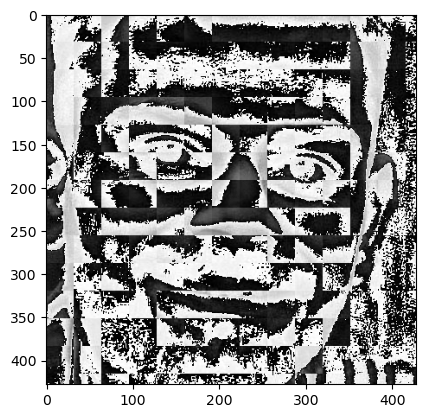

In [78]:
im_har = w2d(cropped_image,'db1',5)#'db1' → Daubechies wavelet of order 1 (Haar wavelet). 5 means the image is breaken down 5 times
plt.imshow(im_har, cmap='gray')

In [79]:
#prints the celebrity name in the path format
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./dataset/cropped/lionel_messi\\lionel_messi1.png',
  './dataset/cropped/lionel_messi\\lionel_messi10.png',
  './dataset/cropped/lionel_messi\\lionel_messi11.png',
  './dataset/cropped/lionel_messi\\lionel_messi12.png',
  './dataset/cropped/lionel_messi\\lionel_messi13.png',
  './dataset/cropped/lionel_messi\\lionel_messi14.png',
  './dataset/cropped/lionel_messi\\lionel_messi15.png',
  './dataset/cropped/lionel_messi\\lionel_messi16.png',
  './dataset/cropped/lionel_messi\\lionel_messi17.png',
  './dataset/cropped/lionel_messi\\lionel_messi18.png',
  './dataset/cropped/lionel_messi\\lionel_messi19.png',
  './dataset/cropped/lionel_messi\\lionel_messi2.png',
  './dataset/cropped/lionel_messi\\lionel_messi20.png',
  './dataset/cropped/lionel_messi\\lionel_messi21.png',
  './dataset/cropped/lionel_messi\\lionel_messi22.png',
  './dataset/cropped/lionel_messi\\lionel_messi23.png',
  './dataset/cropped/lionel_messi\\lionel_messi25.png',
  './dataset/cropped/lionel_messi\

In [80]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

# training part

In [81]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))#Resizes the original image to 32×32 pixels.
        img_har = w2d(img,'db1',5)#convert to wavelet image
        scalled_img_har = cv2.resize(img_har, (32, 32))#resize the wavelet image
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),#og_image   32x32x3--.RGB color,   =3072x1 coverts the image to column vector
                                  scalled_img_har.reshape(32*32,1)))#wavelet image
        X.append(combined_img)
        y.append(class_dict[celebrity_name])    

In [82]:
len(X)

185

In [83]:
len(X[0])

4096

In [84]:
32*32*3 + 32*32

4096

In [85]:
X[0]

array([[100],
       [129],
       [140],
       ...,
       [237],
       [234],
       [232]], dtype=uint8)

In [86]:
y[0]

0

In [87]:
X = np.array(X).reshape(len(X),4096).astype(float)#We reshape X to make it compatible with machine learning models, which expect input data in a structured (samples × features) format.
X.shape

(185, 4096)

# svm

In [88]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline #Instead of writing separate preprocessing and training steps, we can combine them into one object.
from sklearn.metrics import classification_report

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'linear', C = 1))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.8723404255319149

In [90]:
print(classification_report(y_test, pipe.predict(X_test)))


              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.82      0.90      0.86        10
           2       0.75      0.75      0.75         4
           3       0.88      0.78      0.82         9
           4       0.93      1.00      0.97        14

    accuracy                           0.87        47
   macro avg       0.85      0.85      0.85        47
weighted avg       0.87      0.87      0.87        47



In [91]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [92]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [93]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.833333,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.653968,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.848413,{'logisticregression__C': 5}


In [94]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=5, solver='liblinear'))])}

In [95]:
best_estimators['svm'].score(X_test,y_test)

0.8723404255319149

In [96]:
best_estimators['random_forest'].score(X_test,y_test)

0.6808510638297872

In [42]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8269230769230769

In [43]:
best_clf = best_estimators['svm']

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 9,  0,  0,  1,  1],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  7,  1,  0],
       [ 1,  1,  0,  8,  0],
       [ 1,  2,  0,  1, 11]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

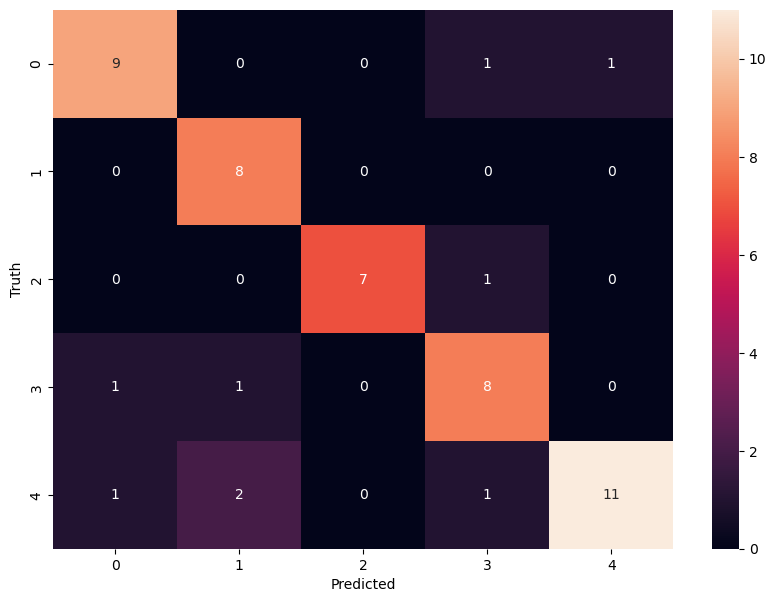

In [45]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [46]:

class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [47]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file  so that we can use this without need of retraining it
joblib.dump(best_clf, 'saved_model.pkl') 

['saved_model.pkl']

In [48]:
#This file ensures that if you restart the program or transfer the model, you don’t have to manually define class_dict again.
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))